#### **Hierarchical Clustering**

- Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters 
- The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Type of Hierarchical Clustering**
1. **Agglomerative Clustering** which is a method of clustering which builds a hierarchy of clusters by merging together small clusters, it is a **bottom up approach**

2. **Divisive Clustering**, is a **top down approach** where we consider all the observation as a single big cluster and then divide into small clusters  

#### **Denodogram**

- The dendrogram is a visual representation of the compound correlation data
- The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes
- Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node

#### **Silhouette Score**

- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to **calculate the goodness of a clustering technique** 
- Its value ranges from -1 to 1.
    1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
    2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
    3. **Score = -1: Means clusters are assigned in the wrong way**

# Introduction to Hierarchical Clustering in Python with Sklearn

In [1]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
from IPython.display import Image
import scipy.cluster.hierarchy as sch

HIERARCHICAL CLUSTERING ALGORITHIM STEPS :


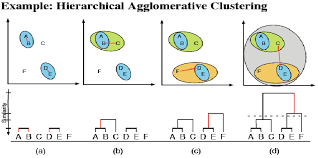

In [ ]:
print('HIERARCHICAL CLUSTERING ALGORITHIM STEPS :')
Image('F037A50D-FDEF-4187-962D-CB74158F4FFC.png')

HIERARCHICAL CLUSTERING ALGORITHIM TYPE :


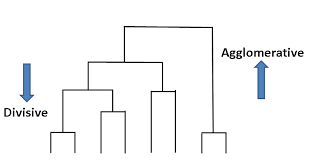

In [ ]:
print('HIERARCHICAL CLUSTERING ALGORITHIM TYPE :')
Image('207B916C-6140-4038-AA53-0027F4E66C3C.png')

DIFFERENT TYPE OF LINKAGE :


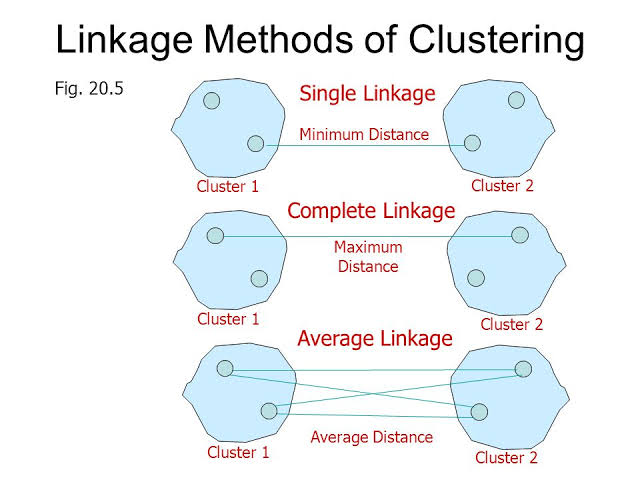

In [ ]:
print('DIFFERENT TYPE OF LINKAGE :')
Image('093C32DB-A817-4026-889C-CF26F7240891.jpeg')

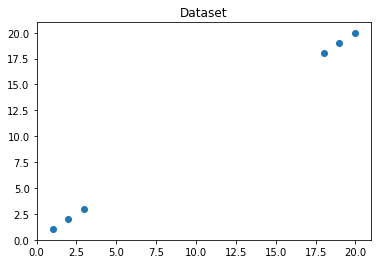

In [2]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

#### **DENDOGRAM**

- A dendrogram is a diagram that shows the hierarchical relationship between objects. 
- **It is a summary of the distance matrix.** For example, the dendrogram suggests that C and D are much closer to each other than is C to B
- Dendrograms cannot tell you how many clusters you should have

**A common mistake people make when reading dendrograms is to assume that the shape of the dendrogram gives a clue as to how many clusters exist.** 

- In the example above, the (incorrect) interpretation is that the dendrogram shows that there are two clusters, as the distance between the clusters (the vertical segments of the dendrogram) are highest between two and three clusters.
- Interpretation of this kind is justified only when the ultrametric tree inequality holds, which, as mentioned above, is very rare.
- In general, it is a mistake to use dendrograms as a tool for determining the number of clusters in data. Where there is an obviously “correct” number of clusters this will often be evident in a dendrogram. 

However, dendrograms often suggest a correct number of clusters when there is no real evidence to support the conclusion.

DENDOGRAM EXAMPLE :


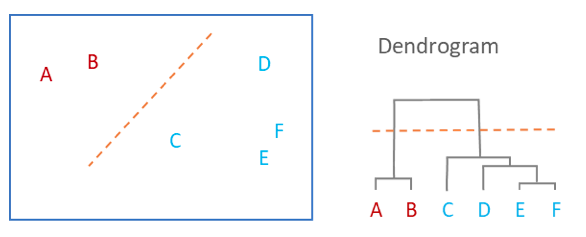

In [16]:
print('DENDOGRAM EXAMPLE :')
Image('70CA363E-F7FA-4C9D-871F-4D3FC35EC0B7.png')

DENDOGRAM OVERVIEW :


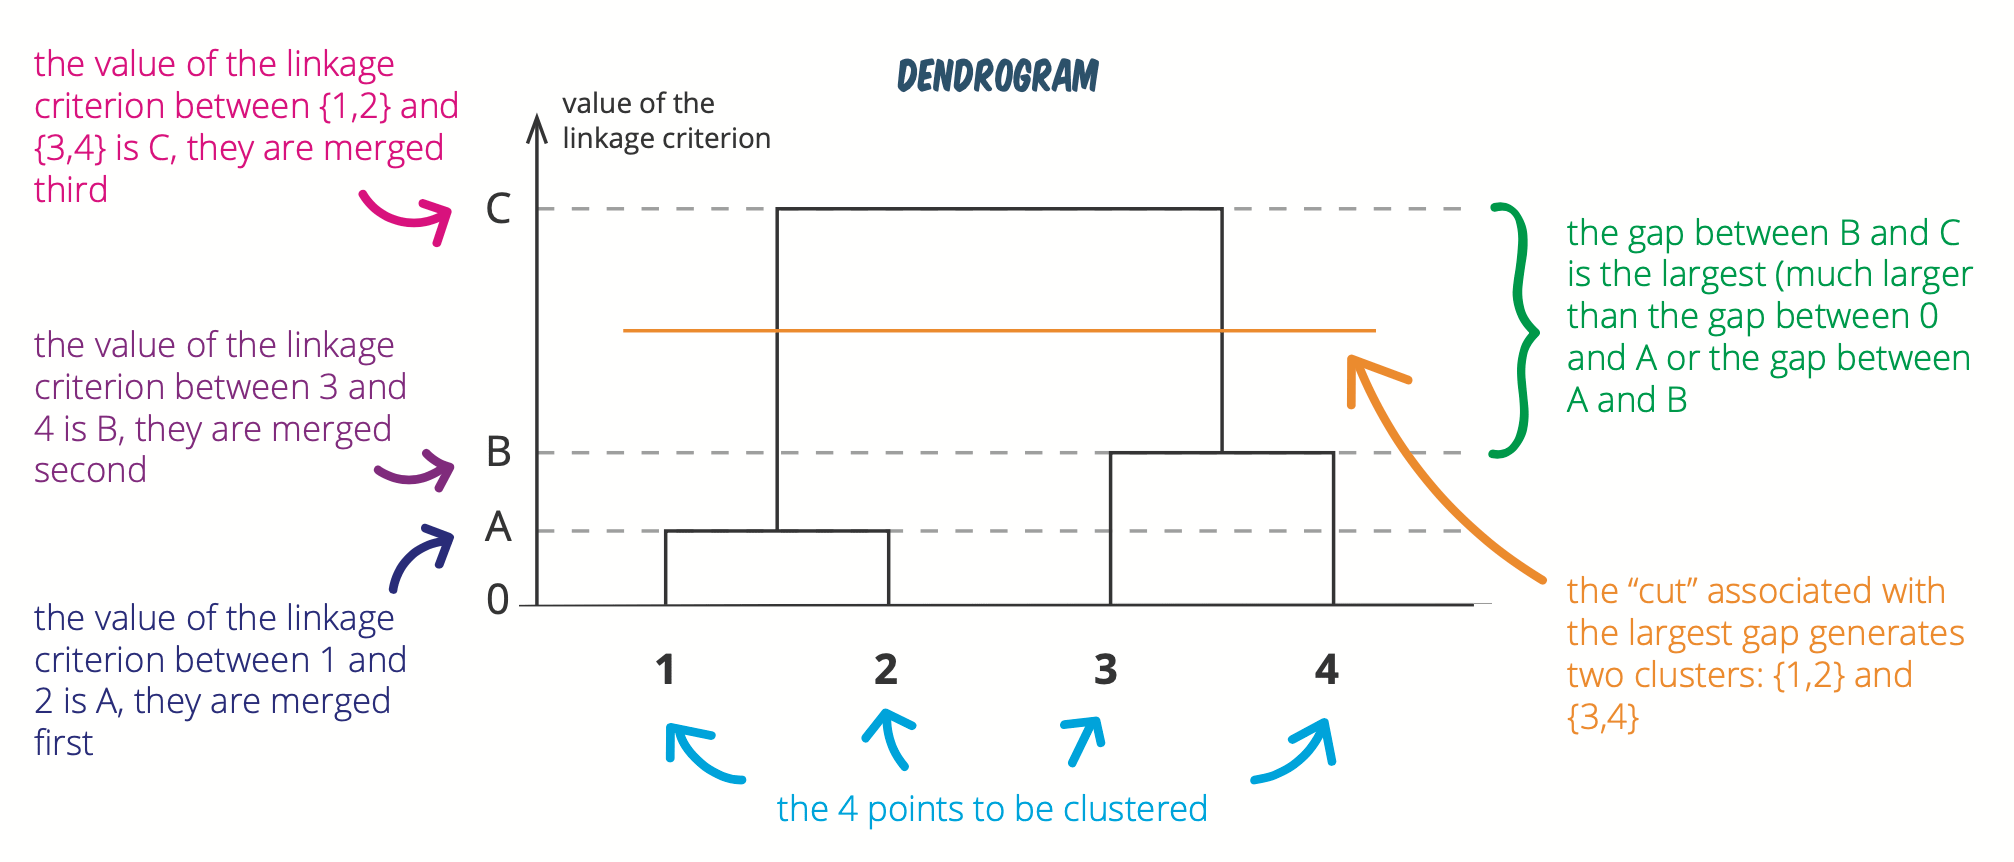

In [20]:
print('DENDOGRAM OVERVIEW :')
Image('EE76D8A0-92FA-4705-B1F6-748F38D83112.png')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

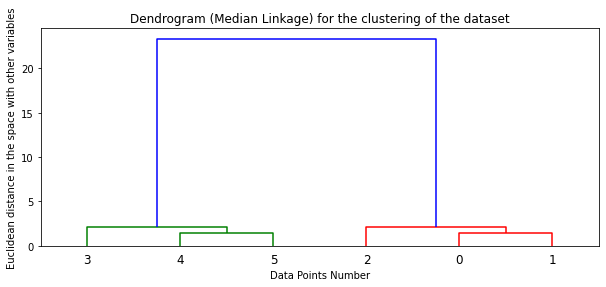

In [3]:
# Dendrogram (Median Linkage) 

Z = sch.linkage(data, method = 'median')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

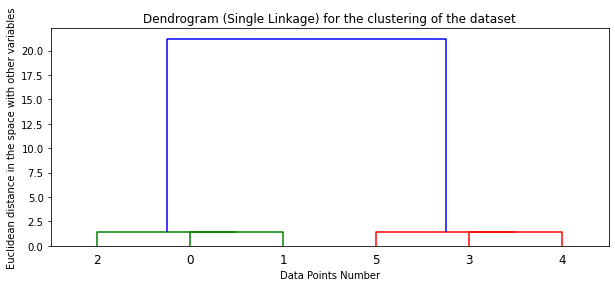

In [4]:
# Dendrogram (Single Linkage) 

Z = sch.linkage(data, method = 'single')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

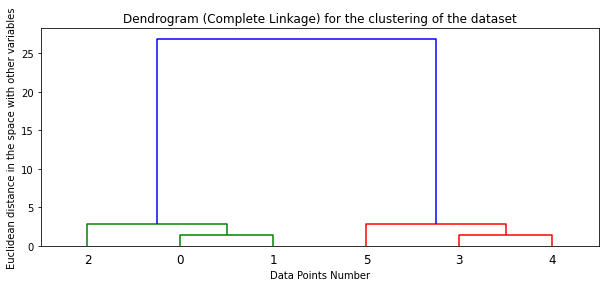

In [5]:
# Dendrogram (Complete Linkage) 

Z = sch.linkage(data, method = 'complete')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

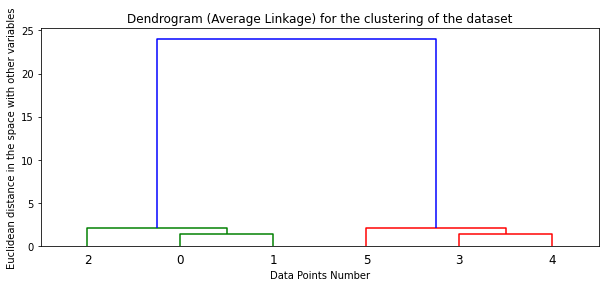

In [6]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(data, method = 'average')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [7]:
# Building an Agglomerative Clustering Model : Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(data)
print(model_clt)
print('\n')

data['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(data['clusters'])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [8]:
# Silhouette Score
data = pd.DataFrame({'x':x_axis, 'y':y_axis})
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')

For cluster= 2, Silhouette Coefficient is 0.9213643790849674
For cluster= 3, Silhouette Coefficient is 0.5428175766885445
For cluster= 4, Silhouette Coefficient is 0.16666666666666666
For cluster= 5, Silhouette Coefficient is 0.08333333333333333


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2


# Question Part

In [ ]:
iris = # load IRIS dataset with sklearn.datasets
iris_data = # load it into pandas dataframe
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

In [ ]:
# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

In [ ]:
# Now we should separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = # Write code here
print(iris_Y)


"""

Here calculate the frequency of each label

"""

In [ ]:
# Filter Setosa Data in this block of code and print the dataframe which contains it

Setosa = 
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print()
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print()
print("Last 6 Rows of Setosa")
print()

In [ ]:
# Filter Setosa for 2D Plot and complete the code

print("Setosa for 2D Plot")
print("X Axis points")
print()
print("Y Axis Points")
print()
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Filter Versicolour Data in this block of code and print the dataframe which contains it

Versi = 
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print()
print("Top 6 Rows of Versicolour")
Versi_v2 = 
print()
print("Last 6 Rows of Versicolour")
print()

In [ ]:
# Filter Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print()
print("Y Axis Points")
print()
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Filter Virginica Data in this block of code and print the dataframe which contains it

Virginica = 
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print()
print("Top 6 Rows of Virginica")
Virginica_v2 = 
print()
print("Last 6 Rows of Virginica")
print()

In [ ]:
# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print()
print("Y Axis Points")
print()
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph
# So here you should complete the code below to plot the scatter of these three classes together

plt.scatter()
plt.scatter()
plt.scatter()
plt.legend()

In [19]:
# Plotting of Dendrogram

# We make use of dendrogram to decide the number of clusters required for our dataset
# A dendrogram is a tree diagram which illustrates the arrangement of clusters.
import scipy.cluster.hierarchy as sch

# Pick the features from the original dataset
# We don't need Target Column in Clustering
iris_X_1 = iris_data[['sepal length (cm)','sepal width (cm)',
                      'petal length (cm)','petal width (cm)']]
iris_X_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# We finally plot a Dendrogram 
# which helps us in deciding what the threshold values should be for the clustering algorithm
# Basically, we decide the number of clusters by using this dendrogram.

# use median linkage and plot the dendogram for this part

In [ ]:
# Single Linkage - Nearest Point

# use single linkage and plot the dendogram for this part

In [ ]:
# Complete Linkage - Farthest Point 

# use complete linkage and plot the dendogram for this part


In [ ]:
# Average Linkage - Average Distance between all points

# use average linkage and plot the dendogram for this part

In [ ]:
# Building an Agglomerative Clustering Model
# Initialise Model
# We analyse the above-created dendrogram 
# decide that we will be making 3 clusters for this dataset

cluster_H = # use AgglomerativeClustering function for this part with 3 clusters

# Fitting Model
# After building Agglomerative clustering, we will fit our iris data set
# Note that only the independent variables from the Iris dataset 
# are taken into account for the purpose of clustering

model_clt = cluster_H.fit(iris_X_1)
model_clt

In [ ]:
# Predicting Output Class

print('Output Clusters are')
pred1 = # Write code here
print(pred1)
# Frequency count of the Output clusters
unique, counts = # find output clusters 
print() # print unique values

In [ ]:
# Visualizing Output

print('Original Cluster')
print(freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print('Hierarchical Clustering Output Cluster')
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters')
print() # print silhouette score here
print('\n')

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

# We use the above-found class labels and visualise how the clusters have been formed.

plt.scatter()
plt.scatter()
plt.scatter()
plt.legend()